In [1]:
import numpy as np
import matplotlib.pyplot as plt
import firtez_dz as frz
from astropy.io import fits

In [2]:
plt.rc('text', usetex = False)

In [3]:
def Gaussian(w,sigma,A,u,v,x,y):
    r = np.sqrt(x**2+y**2)
    phi = np.arctan2(y,x)
    F = (1.0 + A*np.cos(u*phi+v))* w * (1/(2*np.pi*(sigma**2)) * np.exp(-r**2/(2*sigma**2)))
    return F

In [216]:
r_value = np.linspace(0,4,41)
phi_value = np.linspace(0,2*np.pi,41)

In [245]:
pixel_scale_intervals = 0.504  #arcsec
r = 0.504/(360/725)
r

1.0150000000000001

In [14]:
x_value = np.linspace(-4.032,4.032,481)
y_value = np.linspace(-4.032,4.032,481)

In [203]:
0.504*4

2.016

In [15]:
G = np.zeros((481,481))
for i in range(481):
    for j in range(481):
        G[i,j] = Gaussian(0.747,0.417,0.164,1,-2.22,x_value[i],y_value[j]) + Gaussian(0.126,1.45,0.48,1,2.36,x_value[i],y_value[j]) + Gaussian(0.0049,2.1,0.74,2,-2.36,x_value[i],y_value[j]) \
                + Gaussian(0.0428,4.66,0.776,1,1.194,x_value[i],y_value[j]) + Gaussian(0.035,26.16,0.122,1,2.63,x_value[i],y_value[j])
        

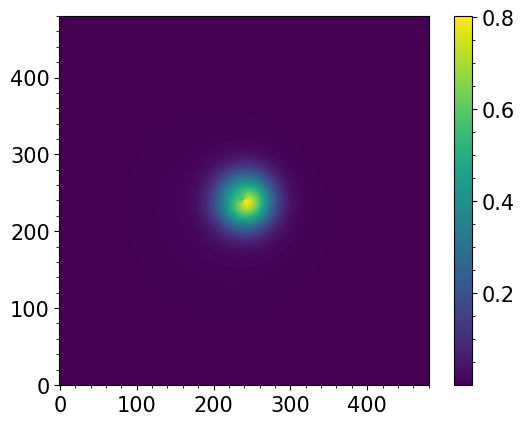

In [270]:
plt.imshow(G,origin='lower')
plt.colorbar()

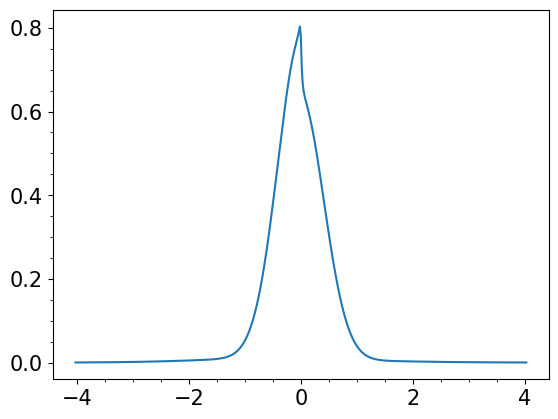

In [268]:
plt.plot(x_value, G[:,241])

In [68]:
Gaussian(1,1,1,1,0,-1,0)

0.9034676473699461

In [58]:
x = np.linspace(-20,20,41)

In [71]:
phi = np.arctan2(0,-1)

In [73]:
np.cos(phi)

-1.0

In [61]:
x

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

In [8]:
import astropy.convolution as apconv

In [9]:
D = 0.14  #m
llambda = 6173e-10  #m
pix_size = 12e3 #m
pixel_scale_arcsec = pix_size / 725e3
diff_limit_arcsec = 1.22 * llambda / D * 206265
diff_limit_pixels = diff_limit_arcsec / pixel_scale_arcsec
PSF = apconv.AiryDisk2DKernel(diff_limit_pixels, mode='oversample')

Text(0.5, 1.0, 'airy disk')

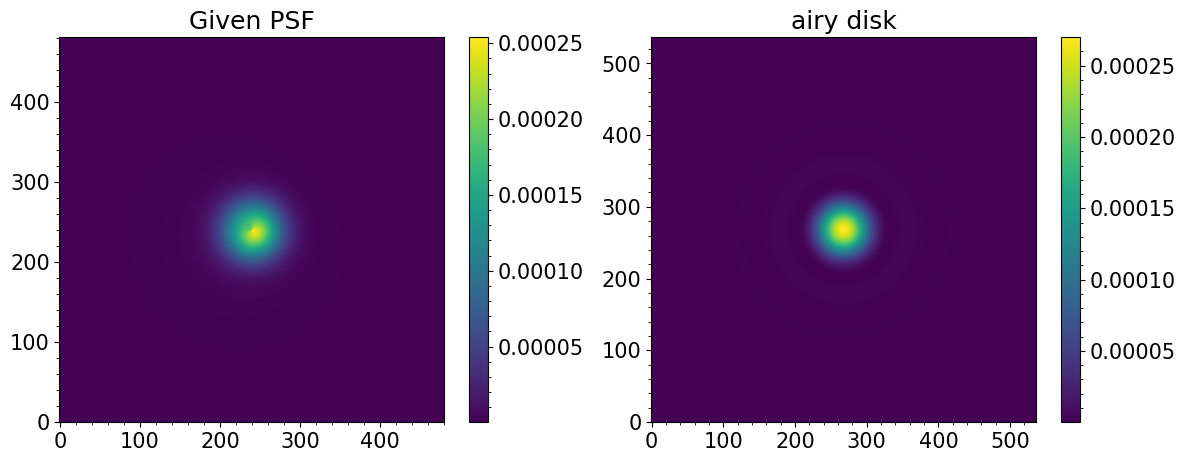

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.imshow(G/np.sum(G),origin='lower')
plt.title('Given PSF')
plt.colorbar()
plt.subplot(122)
plt.imshow(PSF,origin='lower')
plt.colorbar()
plt.title('airy disk')

In [227]:
PSF.shape

(537, 537)

In [244]:
diff_limit_pixels


67.03635213705356

In [233]:
diff_limit_arcsec

1.1095672077857142